 ## Get file

The first step in this project is to import the required libraries.

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


We then mount our drive so we can upload the required document.

In [38]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [39]:
#Read Excel dataset
df = pd.read_excel('/content/drive/MyDrive/HNG12/HNG12-Stage2/marketing_campaign_dataset.xlsx')
df.head()

,Campaign_ID,Company,Campaign_Type,Duration,Target_Audience,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Date,Clicks,Impressions,Engagement_Score,Customer_Segment
0,1,Innovate Industries,Email,30 days,Men 18-24,Google Ads,0.04,16174,6.29,Chicago,2021-01-01 00:00:00,506,1922,6,Health & Wellness
1,2,NexGen Systems,Email,60 days,Women 35-44,Google Ads,0.12,11566,5.61,New York,2021-02-01 00:00:00,116,7523,7,Fashionistas
2,3,Alpha Innovations,Influencer,30 days,Men 25-34,YouTube,0.07,10200,7.18,Los Angeles,2021-03-01 00:00:00,584,7698,1,Outdoor Adventurers
3,4,DataTech Solutions,Display,60 days,All Ages,YouTube,0.11,12724,5.55,Miami,2021-04-01 00:00:00,217,1820,7,Health & Wellness
4,5,NexGen Systems,Email,15 days,Men 25-34,YouTube,0.05,16452,6.50,Los Angeles,2021-05-01 00:00:00,379,4201,3,Health & Wellness


## Slight look at the data shape, stats and general info

Our dataset has 200005 rows & 15 columns

In [40]:
df.shape

(200005, 15)

The info on the dataframe shows there are no null values and 7 numerical values.

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200005 entries, 0 to 200004
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Campaign_ID       200005 non-null  int64  
 1   Company           200005 non-null  object 
 2   Campaign_Type     200005 non-null  object 
 3   Duration          200005 non-null  object 
 4   Target_Audience   200005 non-null  object 
 5   Channel_Used      200005 non-null  object 
 6   Conversion_Rate   200005 non-null  float64
 7   Acquisition_Cost  200005 non-null  int64  
 8   ROI               200005 non-null  float64
 9   Location          200005 non-null  object 
 10  Date              200005 non-null  object 
 11  Clicks            200005 non-null  int64  
 12  Impressions       200005 non-null  int64  
 13  Engagement_Score  200005 non-null  int64  
 14  Customer_Segment  200005 non-null  object 
dtypes: float64(2), int64(5), object(8)
memory usage: 22.9+ MB


In [42]:
# Convert the 'Date' column to datetime objects with the correct format
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

In [43]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200005 entries, 0 to 200004
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Campaign_ID       200005 non-null  int64         
 1   Company           200005 non-null  object        
 2   Campaign_Type     200005 non-null  object        
 3   Duration          200005 non-null  object        
 4   Target_Audience   200005 non-null  object        
 5   Channel_Used      200005 non-null  object        
 6   Conversion_Rate   200005 non-null  float64       
 7   Acquisition_Cost  200005 non-null  int64         
 8   ROI               200005 non-null  float64       
 9   Location          200005 non-null  object        
 10  Date              200005 non-null  datetime64[ns]
 11  Clicks            200005 non-null  int64         
 12  Impressions       200005 non-null  int64         
 13  Engagement_Score  200005 non-null  int64         
 14  Cust

In [44]:
df.describe()

,Campaign_ID,Conversion_Rate,Acquisition_Cost,ROI,Date,Clicks,Impressions,Engagement_Score
count,200005.000000,200005.000000,200005.000000,200005.000000,200005,200005.000000,200005.000000,200005.000000
mean,100003.000000,0.080069,12504.441794,5.002416,2021-07-01 23:37:44.289392896,549.774591,5507.307107,5.494673
min,1.000000,0.010000,5000.000000,2.000000,2021-01-01 00:00:00,100.000000,1000.000000,1.000000
25%,50002.000000,0.050000,8740.000000,3.500000,2021-04-02 00:00:00,325.000000,3266.000000,3.000000
50%,100003.000000,0.080000,12497.000000,5.010000,2021-07-02 00:00:00,550.000000,5518.000000,5.000000
75%,150004.000000,0.120000,16264.000000,6.510000,2021-10-01 00:00:00,775.000000,7753.000000,8.000000
max,200005.000000,0.150000,20000.000000,8.000000,2021-12-31 00:00:00,1000.000000,10000.000000,10.000000
std,57736.614632,0.040602,4337.663210,1.734485,NaN,260.019354,2596.863794,2.872593


Looking at unique values in each column allows you to think of what analysis to do later.

In [45]:
# Find unique values
df.nunique()

,0
Campaign_ID,200005
Company,5
Campaign_Type,5
Duration,4
Target_Audience,5
Channel_Used,6
Conversion_Rate,15
Acquisition_Cost,15001
ROI,601
Location,5


In [46]:
# Find duplicate rows based on all columns
duplicate_rows = df[df.duplicated()]

# To get the number of duplicate rows
num_duplicates = len(duplicate_rows)
print(f"\nNumber of duplicate rows: {num_duplicates}")


Number of duplicate rows: 0


## Analysis for the marketing campaign dataset

### Target Audiences

In [69]:
# Unique TA
unique_target_audiences = df['Target_Audience'].unique()
unique_target_audiences


array(['Men 18-24', 'Women 35-44', 'Men 25-34', 'All Ages', 'Women 25-34'],
      dtype=object)

In [71]:
#Group the data by Target_Audience and Channel_Used and calculate the average Engagement_Score
engagement_heatmap_data = df.groupby(['Target_Audience', 'Channel_Used'])['Engagement_Score'].mean().unstack().round(2)
engagement_heatmap_data

Channel_Used,Email,Facebook,Google Ads,Instagram,Website,YouTube
Target_Audience,,,,,,
All Ages,5.48,5.47,5.52,5.47,5.50,5.48
Men 18-24,5.53,5.47,5.53,5.56,5.53,5.48
Men 25-34,5.54,5.55,5.45,5.44,5.50,5.48
Women 25-34,5.44,5.50,5.50,5.48,5.53,5.51
Women 35-44,5.45,5.53,5.48,5.50,5.49,5.48


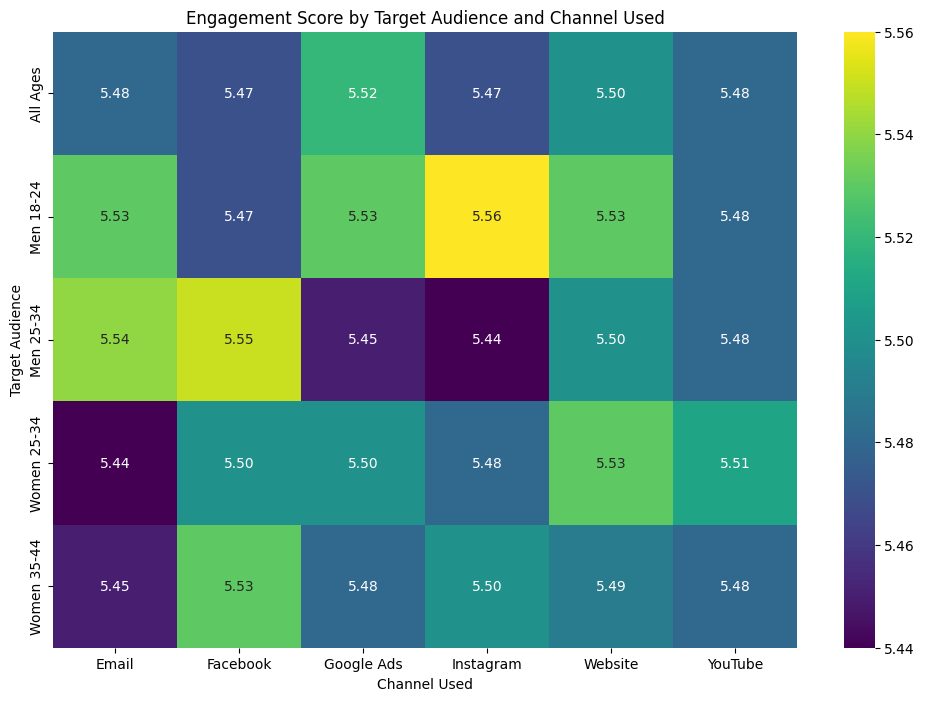

In [72]:
plt.figure(figsize=(12, 8))
sns.heatmap(engagement_heatmap_data, annot=True, cmap='viridis', fmt=".2f")
plt.title('Engagement Score by Target Audience and Channel Used')
plt.xlabel('Channel Used')
plt.ylabel('Target Audience')
plt.show()

As much as the differences aren't so big, It's important to see which channels are favoured by which audiences. For example, we see Men 18-24 really responded to Instagram.

### Comparing each Campaign Type's  Acquisition Cost vs ROI

Average acquisition cost is almost similar for each campaign type.

In [47]:
average_acquisition_cost = df.groupby('Campaign_Type')['Acquisition_Cost'].mean()
average_acquisition_cost

,Acquisition_Cost
Campaign_Type,
Display,12508.180929
Email,12495.237566
Influencer,12507.319716
Search,12498.736459
Social Media,12512.753510


Average ROI is lowest in social media by a slight margin.

In [48]:
average_roi = df.groupby('Campaign_Type')['ROI'].mean()
average_roi

,ROI
Campaign_Type,
Display,5.006497
Email,4.994274
Influencer,5.011040
Search,5.008357
Social Media,4.991781


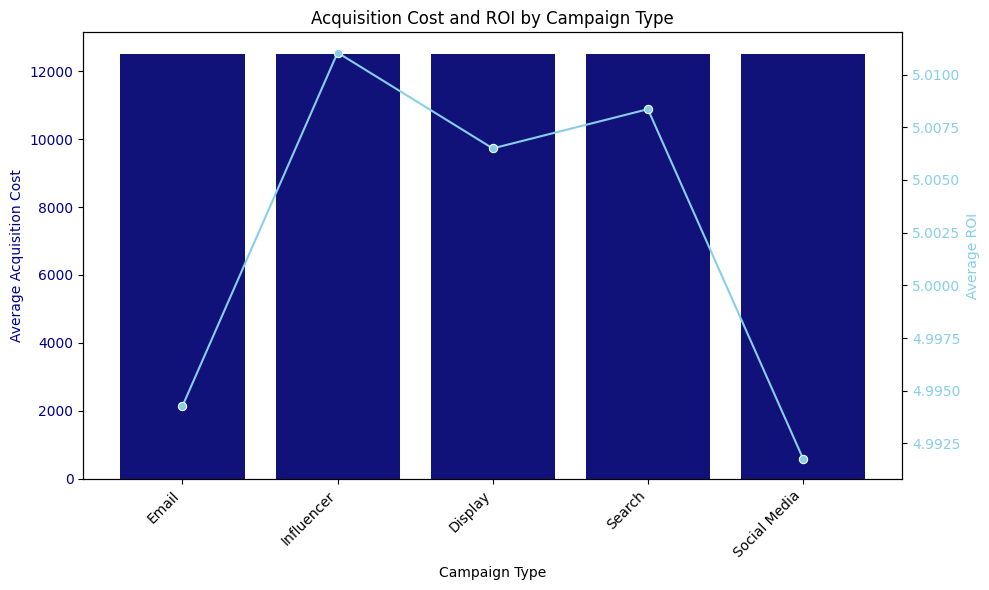

In [49]:
# Create the bar plot for Acquisition_Cost
fig, ax1 = plt.subplots(figsize=(10, 6))
sns.barplot(x='Campaign_Type', y='Acquisition_Cost', data=df, estimator=np.mean, errorbar=None, ax=ax1, color='darkblue')
ax1.set_xlabel('Campaign Type')
ax1.set_ylabel('Average Acquisition Cost', color='darkblue')
ax1.tick_params(axis='y', labelcolor='darkblue')
plt.xticks(rotation=45, ha='right')


# Create a second y-axis for the ROI line plot
ax2 = ax1.twinx()
sns.lineplot(x='Campaign_Type', y='ROI', data=df, estimator=np.mean, errorbar=None, ax=ax2, color='skyblue', marker='o')
ax2.set_ylabel('Average ROI', color='skyblue')
ax2.tick_params(axis='y', labelcolor='skyblue')

# Set the title
plt.title('Acquisition Cost and ROI by Campaign Type')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Display the plot
plt.show()

### Comparing Channel Used & Conversion Rate

Channel_Used
Email         0.080282
Facebook      0.079990
Google Ads    0.080181
Instagram     0.079886
Website       0.080182
YouTube       0.079890
Name: Conversion_Rate, dtype: float64


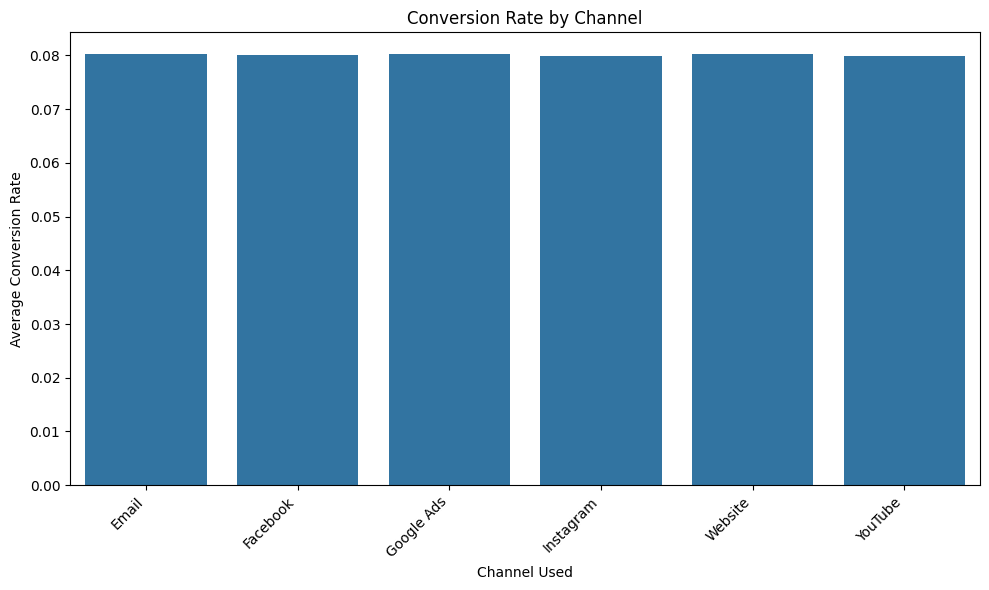

In [50]:
# We will group the data by 'Channel_Used' and calculate the mean 'Conversion_Rate' for each channel
channel_conversion = df.groupby('Channel_Used')['Conversion_Rate'].mean()
print(channel_conversion)

# Create a bar plot to visualize the comparison
plt.figure(figsize=(10, 6))
sns.barplot(x=channel_conversion.index, y=channel_conversion.values)
plt.xlabel('Channel Used')
plt.ylabel('Average Conversion Rate')
plt.title('Conversion Rate by Channel')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


We can conclude that channels used aren't affecting conversion rate

### Click Through Rate Over Time

In [51]:
# Calculate Click-Through Rate (CTR) as clicks ÷ impressions = CTR%
df['CTR'] =(df['Clicks'] / df['Impressions']) * 100

# Display the DataFrame with the new CTR column
print(df[['Clicks', 'Impressions', 'CTR']].head())



   Clicks  Impressions        CTR
0     506         1922  26.326743
1     116         7523   1.541938
2     584         7698   7.586386
3     217         1820  11.923077
4     379         4201   9.021662


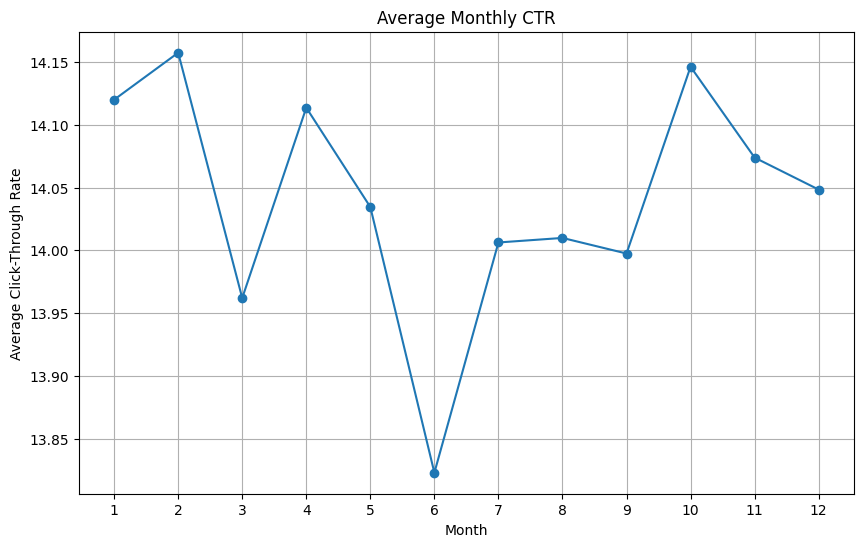

In [52]:
# Extract the month from the 'Date' column
df['Month'] = df['Date'].dt.month

# Group by month and calculate the average CTR
monthly_ctr = df.groupby('Month')['CTR'].mean().reset_index()

# Plotting average monthly CTR
plt.figure(figsize=(10, 6))
plt.plot(monthly_ctr['Month'], monthly_ctr['CTR'], marker='o')  # Added markers for better visualization
plt.xlabel('Month')
plt.ylabel('Average Click-Through Rate')
plt.title('Average Monthly CTR')
plt.xticks(monthly_ctr['Month'])  # Set x-axis ticks to show all months
plt.grid(True)
plt.show()

### Cost Per Click in different Customer Segments

In [53]:
# Calculate CPC
df['CPC'] = df['Acquisition_Cost'] / df['Clicks']

# Display the DataFrame with the new CPC column
print(df[['Acquisition_Cost', 'Clicks', 'CPC']].head())


   Acquisition_Cost  Clicks        CPC
0             16174     506  31.964427
1             11566     116  99.706897
2             10200     584  17.465753
3             12724     217  58.635945
4             16452     379  43.408971


In [60]:
# Group by customer segments and calculate the total CPCs
t_CPC_segment = df.groupby('Customer_Segment')['CPC'].sum().round(2).sort_values(ascending=False).reset_index()
t_CPC_segment

,Customer_Segment,CPC
0,Foodies,1290640.71
1,Tech Enthusiasts,1284059.05
2,Outdoor Adventurers,1281602.34
3,Fashionistas,1273804.83
4,Health & Wellness,1271716.88


In [62]:
# Group by customer segments and calculate the total CPCs
t_CPC_segment = df.groupby('Customer_Segment')['CPC'].mean().round(2).sort_values(ascending=False).reset_index()
t_CPC_segment

,Customer_Segment,CPC
0,Foodies,32.10
1,Fashionistas,32.05
2,Outdoor Adventurers,32.03
3,Tech Enthusiasts,31.98
4,Health & Wellness,31.88


In [61]:
# Group by customer segments and calculate the total CPCs
t_CPC_location = df.groupby('Location')['CPC'].sum().round(2).sort_values(ascending=False).reset_index()
t_CPC_location

,Location,CPC
0,Miami,1294746.00
1,Chicago,1282650.86
2,Los Angeles,1281427.41
3,New York,1277750.86
4,Houston,1265248.68


In [63]:
# Group by customer segments and calculate the total CPCs
t_CPC_location = df.groupby('Location')['CPC'].mean().round(2).sort_values(ascending=False).reset_index()
t_CPC_location

,Location,CPC
0,Miami,32.15
1,Los Angeles,32.08
2,Chicago,32.06
3,New York,31.92
4,Houston,31.83


### Heatmap: Understand relationships between these variables and identify patterns

<Axes: >

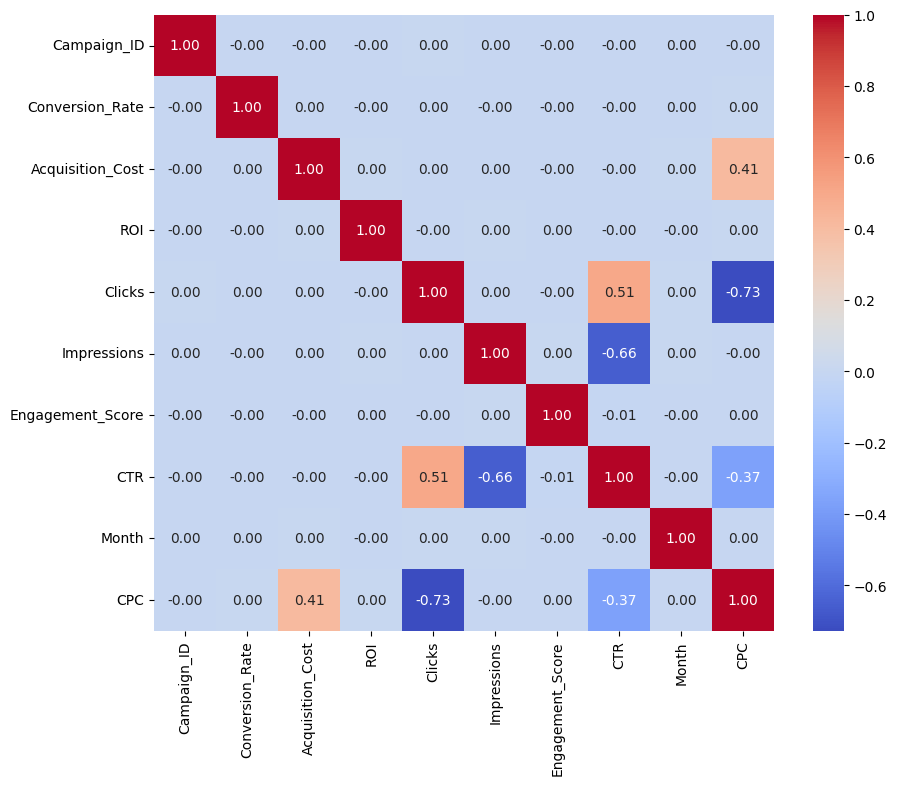

In [67]:
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")